# Earthquakes and Self-Organized Criticality

Adrian Martin

## Table of Contents

* [Introduction](#ex0)
* [Model](#ex1)
* [Numerical Methods](#ex2)
* [Results](#ex3)
* [Analysis](#ex4)
* [Summary](#ex5)
* [References](#ex6)

## Introduction <a id='ex0'></a>

Our earth's crust is divided into large sections called plates, and the lines that divide these plates are fault lines. These plates slowly move in relation to each other. However, due to the friction between plates, they tend to deform and build up potential energy over time. Once this potential energy is large enough, the plates slide past each other suddenly, creating a large ripple of movement, otherwise known as an earthquake. Although the exact mechanics of this are still unknown, we can use models to help understand earthquake motion.

Due to the catastrophic nature of large earthquakes, scientists are searching for ways to predict the time and location of future events. One proposed model for the nature of earthquakes is self-organized criticality (SOC) in the earth's crust. SOC is the tendency for a system to shift towards a critical point in which an event is likely to happen. This is observed in many natural systems. For example, if there is a small sandpile, and sand is continuously being added to it, small amounts of sand will be disrupted, but the overall sandpile remains stable. However, as more sand is added, the pile eventually grows large enough to reach a critical point where the disruption from new the sand causes the pile to collapse $^{[6]}$. 

The SOC model treats the earth as though it is shifted towards a critical point as a result of the earthquake phenomena. The critical point is the time period in which the earth's crust has characteristics, such as temperature and density, that make large earthquakes more likely to happen. If the earth were continuously at a critical point, then an earthquake could happen at any time, and each earthquake has an equally likely chance of being catastrophic. However, there is evidence to suggest that this is not the case. For example, the majority of large earthquakes tend to be preceded by a buildup of smaller events $^{[2]}$. This indicates that there are specific time periods in which the earth's crust is in a critical period. If this is the case, we may be able to predict when large earthquakes are likely to occur, and this could save many lives. 

One commonly used model for earthquakes was proposed by Burridge and Knopoff in 1967 $^{[3]}$. It contains a series of blocks and springs in between two plates on the top and bottom, shown in figure 1. The top plate, along with the blocks represent one of the earth's plates, and the bottom plate represents another adjacent plate. The divide between the blocks and the bottom plate represents a fault line in the earth's crust. These plates slide past each other at a constant rate. In this model, the top plate moves at a steady and slow velocity. It is connected to each block by a leaf spring, or a long narrow cantilever that builds tension as it is bent. As a result, the tension in the leaf springs will slowly increase until a block moves. This may cause other blocks to move due to the force from the block springs. Any sudden motion in a block or a group of blocks represents an earthquake. In this project, the friction force between the bottom plate and the blocks decreases as the velocity of the block increases. This is a one-dimensional block-spring model, and it can be expanded to two dimensions for a more accurate depiction $^{[1]}$.

![image.png](Spring Force Diagram.png)
#### Figure 1 $^{[1]}$

Real-life earthquakes are measured using seismographs that magnify and record the amplitude and duration of ground motion. The size of an earthquake is characterized using the Richter scale. According to this scale, the magnitude of an earthquake is the logarithm of the maximum amplitude recorded by the seismograph, adjusted according to the distance of the seismograph from the earthquake's epicenter $^{[5]}$. It is logarithmic, because it there are a wide range of possible magnitudes, and small earthquakes are by far more common than large ones. The Gutenberg-Richter law states the probability of an earthquake with a specific magnitude occurring$^{[1]}$:

\begin{equation*}
P (\textbf{M}) = Ae^{-b \textbf{M}} \tag {1}
\end{equation*}

Where $\textbf M$ is the magnitude. In Burridge and Knopoff's model this is calculated by taking the logarithm of the moment ($M$), or the total distance the blocks have shifted during an earthquake. Figure 2 depicts magnitude frequency obtained from experimental data. In nature, we tend to observe b values of around 1 with a range between 0.9, and 1.1 $^{[4]}$. If a model can produce data that follows the power law scaling with a similar critical exponent b, it can likely be used to predict the nature of real earthquakes.

![image.png](Magnitude Distrtibution Image.JPG)
#### Figure 2 $^{[8]}$

## Model <a id='ex1'></a>

The equations that model the spring force on the blocks $^{[1]}$:  
* Spring force on a block from neighboring blocks:
    
\begin{equation*}    
F_b = -k_c(x_i - x_{i+1}) - k_c(x_i - x_{i-1}) \tag {2}
\end{equation*}

* Leaf Spring Force from the top plate on a block: 

\begin{equation*}    
F_l = -k_p(x_i - v_0 t) \tag {3}
\end{equation*} 
    
* Friction force due to bottom plate: 

\begin{equation*}
F_f = -\frac{F_0 \textrm{ sign}(v_i)}{1 + |v_i / v_f|} \tag {4}
\end{equation*}

This equation combines the above equations into one differential equation that relates the position of block i and its neighboring blocks to the total force acting on block i:

\begin{equation*}
m_i \frac{d^2 x_i}{dt^2} = k_c(x_{i+1} + x_{i-1} - 2x_i) + k_p(v_0 t - x_i) + F_f \tag {5}
\end{equation*}

Where for each block:  
$F_b$ is force from neighboring block  
$F_l$ is the force from the leaf spring  
$F_f$ is the friction force from the bottom plate  
$k_c$ is the spring constant of springs between blocks  
$k_l$ is the spring constant of the leaf springs  
$x_i$ is the position of block i with respect to equilibrium position  
$v_i$ is the velocity of block i  
$m_i$ is the mass of block i  
$V_0$ is the static friction force  
$V_f$ is the friction coefficient that determines how friction relates to velocity  

This simulation uses models with 25 blocks and 100 blocks. The two blocks at the ends are free, so they only experience spring force from one other block and the leaf spring. The overall force equation is applied to each block at a specific time, given the positions of all the blocks at that time. Since this simulation is a simplification of real life plate motion, the units used to scale these variables are generic time units, distance units, and mass units. The units for velocity are $\frac{distance \space units}{time \space units}$, force units are $\frac{mass \space units \space * \space distance \space units}{time \space units^2}$, and the units for the spring constants are $\frac{mass \space units \space}{time \space units^2}$. 
If this were to represent the motion of real tectonic plates, the time units would be years and the distance units would be meters. This is because earth's plates move at about 2cm to 5cm relative to each other every year$^{[7]}$.

**Boundary Conditions: **
At t = 0, the blocks are set an average of one distance unit apart with a random variation of 0.001 distance units. There is no limit to how far the blocks can travel as a whole, but a single block is not able to move past the position of a neighboring block.

## Numerical Methods <a id='ex2'></a>

I used the Euler method to calculate the position and velocity of the blocks in Burridge and Knpoff's model over time. The Euler method uses the position and velocities of the blocks, as well as the forces that are on the blocks at time t to calculate the change in position and velocity over $\Delta t$. $\Delta t$ is a small period of time, referred to as a time step. For this experiment, I adapted the traditional Euler method to update the positions and velocities of an array of blocks at each time step. I also incorporated an adaptive step size in order to decrease the time it takes to process a large amount of data. When none of the blocks are moving, the step size is large (1 time unit), and when blocks are moving, the step size is small (0.005 time units).

The following equation was used to count the moments of the earthquakes that occurred over the specified timeframe$^{[1]}$: 

\begin{equation*}    
M = \sum_{n=time}\big(\sum_{i=blocks} v_i \Delta t \big) \tag {6}
\end{equation*}

Where $M$ is the total moment of the earthquake. I marked the start of each earthquake by an increase in velocity, and I set the maximum length of an earthquake to 1 time unit, to prevent two earthquakes from being counted as one.

I ran the simulation for a system with uniform block masses (1 mass unit) as well as a system with varied block masses (0.5 to 2 mass units), to test weather varying the masses influences the outcome. To incorporate mass variation into the model, I defined a new motion function that takes an array of masses instead of a single value. In the file Big Data Collection, I ran the both simulations over a very large timescale (5,000,000 timesteps).

In [5]:
import pylab as plt
import numpy as np
import random
%matplotlib inline

In [6]:
def friction (vi, vf, F0):
    """
    Returns the friction of the bottom plate against blocks moving at a specific velocity
    
    Arguments:  vi - initial velocity of the block
                vf - final velocity of the block
                F0 - the static friction force
    
    Returned: The force due to friction
    
    Examples:
    
    >>> friction (0, 1, 20)
    -20.0
    
    >>> friction (1, 1, 20)
    -10.0
    """
    # Calculates sign of vi
    if vi == 0:
        sign = 1
        
    else:
        sign = vi / abs(vi)
        
    force = -((F0) * sign / (1 + abs(vi/vf)))
    return force

In [7]:
def blockMotion (t, blockPositions, vBlock, i, blockNum, kp, kc, mass, F0, v0, vf):
    """
    Returns the differential equation that models the motion of the blocks
    
    Arguments:  t - time
                blockPositions - the positions of the blocks
                vBlock - the velocity of the block
                i - the index of the current block
                blockNum - the number of blocks
                kp - spring constant of leaf springs
                kc - spring constant of springs between blocks
                mass - mass of individual block
                F0 - the static friction force
                v0 - initial velocity of top plate
                vf - the friction coefficient
                
    Returned: The differential equation modeling the motion of the individual blocks
    
    Examples:
    
    >>> blockMotion (0, (0, 1, 2, 3, 4), 0, 2, 5, 0, 0, 1, 0, 1, 20)
    array([ 0.,  0.])
    
    """
    # Sets position and velocity of the block
    xi = blockPositions[i] - i
    vi = vBlock
    
    # Block motion for the first block, connected to a block one distance unit away
    if i == 0:
        xiP = blockPositions[i + 1] - (i + 1)
        springForce = kc*(xiP - xi) + kp * (v0 * t - xi)
    
    # Block motion for the last block, connected to a block one distance unit away
    elif i == blockNum - 1:
        xiM = blockPositions[i - 1] - (i - 1)
        springForce = kc*(xiM - xi) + kp * (v0 * t - xi)
   
    # Block motion for all the middle blocks, connected to their neighbors
    else:
        xiM = blockPositions[i - 1] - (i - 1)
        xiP = blockPositions[i + 1] - (i + 1)
        springForce = kc*(xiP + xiM - 2 * xi) + kp * (v0 * t - xi)
    
    frictionForce = friction (vi, vf, F0)
    
    # If spring force is large enough to overpower friction, change velocity
    if abs(springForce) <= abs(frictionForce):
        dv = -vi
        vi = 0
        dx = vi
    
    else: 
        totalForce = (springForce + frictionForce) / mass
        dx = vi
        dv = totalForce
        
    return np.array([dx, dv], float)

In [8]:
def blockMotionVaryingMasses (t, blockPositions, vBlock, i, blockNum, kp, kc, mass, F0, v0, vf):
    """
    Returns the differential equation that models the motion of the blocks
    
    Arguments:  t - time
                blockPositions - the positions of the blocks
                vBlock - the velocity of the block
                i - the index of the current block
                blockNum - the number of blocks
                kp - spring constant of leaf springs
                kc - spring constant of springs between blocks
                mass - masses of individual blocks
                F0 - the static friction force
                v0 - initial velocity of top plate
                vf - the friction coefficient
                
    Returned: The differential equation modeling the motion of the individual blocks
    
    Examples:
    
    >>> blockMotion (0, (0, 1, 2, 3, 4), 0, 2, 5, 0, 0, 1, 0, 1, 20)
    array([ 0.,  0.])
    
    """
    # Sets position and velocity of the block
    xi = blockPositions[i] - i
    vi = vBlock
    mi = mass[i]
    
    # Block motion for the first block, connected to a block one distance unit away
    if i == 0:
        xiP = blockPositions[i + 1] - (i + 1)
        springForce = kc*(xiP - xi) + kp * (v0 * t - xi)
    
    # Block motion for the last block, connected to a block one distance unit away
    elif i == blockNum - 1:
        xiM = blockPositions[i - 1] - (i - 1)
        springForce = kc*(xiM - xi) + kp * (v0 * t - xi)
   
    # Block motion for all the middle blocks, connected to their neighbors
    else:
        xiM = blockPositions[i - 1] - (i - 1)
        xiP = blockPositions[i + 1] - (i + 1)
        springForce = kc*(xiP + xiM - 2 * xi) + kp * (v0 * t - xi)
    
    frictionForce = friction (vi, vf, F0)
    
    # If spring force is large enough to overpower friction, change velocity
    if abs(springForce) <= abs(frictionForce):
        dv = -vi
        vi = 0
        dx = vi
    
    else: 
        totalForce = (springForce + frictionForce) / mi
        dx = vi
        dv = totalForce
        
    return np.array([dx, dv], float)

In [9]:
def eulerCoupledAdaptive (f, n, blockPositions, vBlock, blockNum, h1, h2, maxPoints, minBlockV, *args, verbose = False):
    """ 
    Solve a coupled system of ODEs by Euler method with fixed number of steps.

    Arguements: f - function giving ODE as y'=f(x,y)
                n - the number of ODEs
                blockPositions - the array containging the initial block positions
                vBlock - initial block velocity
                blockNum - the number of blocks
                interval - tuple region (a,b) on which to solve ODE
                steps - number of steps
    
    Returned: An array containing the positions and velocies of the blocks over time
    """
    
    points = np.zeros((maxPoints, blockNum*2 + 1)) # array to contain all the block positions and velocities over time

    # set up initial point
    t = 0
    points[0,0] = t
    count = 0
    
    # Sets up first row of poitns
    for l in range(1, blockNum + 1):
        points[0,l] = blockPositions[count]   
        count += 1
    for m in range(blockNum + 1, blockNum * 2 + 1):
        points[0,m] = vBlock
    
    # initializes count, dv and r
    count = 1
    dv = 0
    r = (0,0)
    
    while points[maxPoints - 1, 0] == 0: # Repeats until points array is filled up                   
        
        # Proceeds if none of the blocks are moving
        if dv < minBlockV:
            h = h1 # Long timestep
            
            # Repeats Euler calculation until one of the blocks moves or points is full
            while dv < minBlockV and points[maxPoints - 1, 0] == 0:
                
                if verbose == True:
                    print("h1:", t)
                
                # Saves block positions and updates timestep
                oldBlockPositions = blockPositions
                t = t + h
                points[count,0] = t
                dv = 0
                
                # Repeats Euler calculation for each block
                for i in range(0, blockNum): 

                    r = np.array([points[count-1, i + 1], points[count-1, i + 1 + blockNum]]) # Updates r from previous timestep

                    r_new = r + h * f(t, blockPositions, r[1], i, blockNum, *args) # Calculates new r

                    r = r_new 
                    blockPositions[i] = r[0]
                    
                    # Updates dv
                    if r[1] > dv:
                        dv = r[1]
                        
                    if verbose == True:
                        print(i, blockPositions[i], r[1], dv)
                        
                    # Saves values to points
                    points[count,i + 1] = r[0]
                    points[count,i + 1 + blockNum] = r[1]

                count += 1
                
        # Proceeds if any of the blocks are moving        
        elif points[maxPoints - 1, 0] == 0:
            # Resets to previous timestep
            h = h2 # Short timestep
            t -= h1
            count -= 1
            blockPositions = oldBlockPositions
            dv = 0

            # Repeats Euler calculation until one of the blocks moves or points is full
            # This is necessary, because the timestep was reset, so dv will still be zero
            while dv < minBlockV and points[maxPoints - 1, 0] == 0: 
                
                if verbose == True:
                    print("h2:", t)
                
                # Saves block positions and updates timestep                
                oldBlockPositions = blockPositions
                t = t + h
                points[count,0] = t
                dv = 0

                # Repeats Euler calculation for each block                
                for i in range(0, blockNum):

                    r = np.array([points[count-1, i + 1], points[count-1, i + 1 + blockNum]]) # Updates r from previous timestep

                    r_new = r + h * f(t, blockPositions, r[1], i, blockNum, *args) # Calculates new r

                    r = r_new            
                    blockPositions[i] = r[0]
                    
                    # Updates dv
                    if r[1] > dv:
                        dv = r[1]

                    if verbose == True:
                        print(i, blockPositions[i], r[1], dv)
                        
                    # Saves values to points
                    points[count,i + 1] = r[0]
                    points[count,i + 1 + blockNum] = r[1]

                count += 1
                
            # Repeats Euler calculation until all of the blocks are still or points is full                
            while dv >= minBlockV and points[maxPoints - 1, 0] == 0: 
                
                if verbose == True:
                    print("h2:", t)
                
                # Saves block positions and updates timestep
                oldBlockPositions = blockPositions
                t = t + h
                points[count,0] = t
                dv = 0

                # Repeats Euler calculation for each block  
                for i in range(0, blockNum):

                    r = np.array([points[count-1, i + 1], points[count-1, i + 1 + blockNum]]) # Updates r from previous timestep

                    r_new = r + h * f(t, blockPositions, r[1], i, blockNum, *args) # Calculates new r

                    r = r_new            
                    blockPositions[i] = r[0]
                    
                    # Updates dv
                    if r[1] > dv:
                        dv = r[1]

                    if verbose == True:
                        print(i, blockPositions[i], r[1], dv)
                        
                    # Saves values to points
                    points[count,i + 1] = r[0]
                    points[count,i + 1 + blockNum] = r[1]

                count += 1

    return points

In [10]:
def countQuakes (earthquakes, blockNum, timeStep):
    """
    Produces a list of each earthquake and its magnitude
    
    Arguments:  earthquakes - the array containing all earthquake data
                blockNum - the number of blocks
                i - the block index to be examined
                
    Returned: a list containing the magnitude of each earthquake
    """    
    quakes = []
    time = []
    count = 0
    quakeNum = -1
    dvOld = 0
    
    # Repeats for each row of earthquakes
    while count < len(earthquakes):
        
        # Determines if any of the blocks are moving
        dv = 0
        for i in range (0, blockNum):
            if dv < earthquakes[count, blockNum + i + 1]:
                dv = earthquakes[count, blockNum + i + 1]
        
        # If any of the blocks are accelerating add an earthquake
        if dv > dvOld:
            quakeNum += 1
            quakes.append(0)
            time.append(earthquakes[count, 0])
            
            # Add the motion from all the blocks until the earthquake stops
            earthquakeLength = 0
            while dv > 0.0001 and count < len(earthquakes) - 1 and earthquakeLength < 200:

                for i in range (0, blockNum):
                    quakes[quakeNum] += earthquakes[count, blockNum + i + 1] * timeStep

                # Incriments count and recalculates dv
                count += 1            
                dv = 0
                for i in range (0, blockNum):
                    if dv < earthquakes[count, blockNum + i + 1]:
                        dv = earthquakes[count, blockNum + i + 1]
                earthquakeLength += 1
    
        else:
            count += 1
        dvOld = dv
        
    return time, quakes

In [11]:
def countMagnitudes (magnitudes):
    """
    Produces a list of the number of earthquakes that fall within a certain range of magnitudes
    
    Arguments: magnitudes - a list of magnitudes
                
    Returned: a list containing the number of occurrences of each magnitude
    """
    magValues = np.linspace(-7, 7, 29)
    occurences = np.zeros(29, int)
    
    for i in range(0, len(magnitudes)):
        count = 0
        for n in magValues:
            if magnitudes[i] >= n and magnitudes[i] < n + 0.25:
                occurences[count] += 1
            count += 1
                
    return magValues, occurences

## Results <a id='ex3'></a>

### Earthquake Model Over Short Periods of Time

In [12]:
blockPositions = [] # Array to contain random block positions
testBlockPositions = [] #Test array with set block positions
averageSpacing = 1 # Average spacing between blocks
kp = 40 # Leaf spring constant
kc = 250 # Spring constant between blocks
mass = 1 # Mass of blocks
F0 = 50 # Static friction force
v0 = 0.01 # Velocity of the top plate
vBlock = 0 # Initial velocity of blocks
vf = 3.0 # Friction coefficient
blockNum = 25 # Number of blocks
maxTimeSteps = 50000 # Total number of timesteps to be calculated
minBLockV = 1e-8 # Velocity at which small timestep will kick in
timeStepShort = 0.005 # More presice timestep
timeStepLong = 1 # Less precice timestep
variation = 0.001 # Variation in distance between blocks

# Calculates inital block positions
for n in range(0, blockNum + 1):
    blockPositions.append(n * averageSpacing + (random.random() - 0.5) * 2 * variation)
    testBlockPositions.append(n)

In [13]:
# Calculates earthquake postition and velocity over the given time range
earthquake = eulerCoupledAdaptive (blockMotion, 2, blockPositions, vBlock, blockNum, timeStepLong,\
                           timeStepShort, maxTimeSteps, minBLockV, kp, kc, mass, F0, v0, vf) 

In [15]:
# Sets up new array for plotting
earthquakePlot = np.copy(earthquake)

# Normalizes block positions relative to their equilibrium positions
for n in range(1, blockNum + 1):
    for m in range(0, maxTimeSteps):
        earthquakePlot[m,n] += -n + 1

Text(0.5,1,'Velocity of Blocks Over Time')

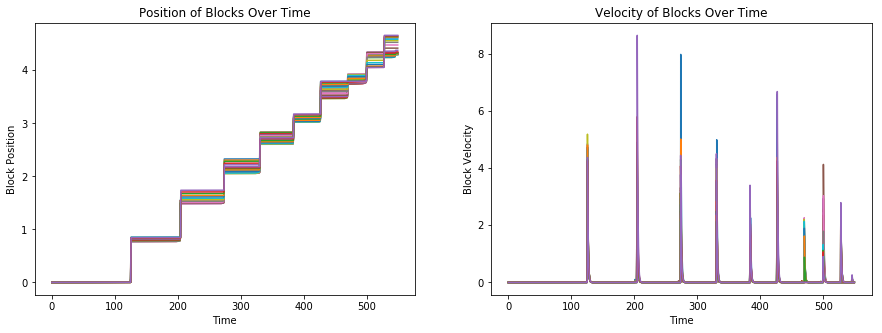

In [17]:
plt.figure(figsize = (15,5))

# Plots all of the block positions on the same plot
plt.subplot(121)
for i in range (1, blockNum + 1):
    plt.plot(earthquakePlot[:, 0], earthquakePlot[:, i])
plt.xlabel("Time")
plt.ylabel("Block Position")
plt.title("Position of Blocks Over Time")

# Plots all of the block velocities on the same plot
plt.subplot(122)
for i in range (0, blockNum):
    plt.plot(earthquakePlot[:,0], earthquakePlot[:, blockNum + i + 1])
plt.xlabel("Time")
plt.ylabel("Block Velocity")
plt.title("Velocity of Blocks Over Time")

#### Figure 3

These plots depict the change in position and velocity of the series of blocks described above over a time span of about 600 time units. In this example, there are 25 blocks with random spacing within a variation of 0.001 distance units from their equilibrium positions at t = 0. They are connected by springs with a uniform kc value of 250$\frac {distance \space units}{time \space units^2}$. Each block's motion is plotted individually with its own color, and its position shown is relative to its equilibrium position.  

The left plot depicts the position of the blocks over time. Each time the position of a block or group of blocks changes, an earthquake has happened. This shows that at time t = 0, each block is near its equilibrium position. The first large earthquake occurs at t = 120, where all of the blocks move at about the same time to a position that is about one distance unit away from their initial equilibrium positions. Then the blocks remain in their new positions until the second large earthquake occurs at t = 205. After this, large earthquakes occur at t = 280, 340, etc. Because the starting positions of the blocks was varied slightly, the time at which each event happens, and its magnitude also varies. This plot shows that sometimes, the blocks will move in sync with each other, and other times, only a small number of the blocks moves at once. For example, the first large earthquake at t = 120 includes all of the blocks, where the earthquake that occurs at t = 460 only includes a small number of the blocks. 

The right plot depicts the velocity of the blocks over time. At the time of an earthquake, there is a large spike in velocity, indicating that a group of blocks has moved suddenly. This plot corresponds to the plot of position over time, because the spikes in velocity occur at the same time the blocks change position. This plot also shows that the size of the earthquakes ranges from very small to very large. For example, during the earthquake that occurred at t = 205 the blocks moved about ten times faster than during the earthquake that occurred at t = 550.

(0.0001, 10)

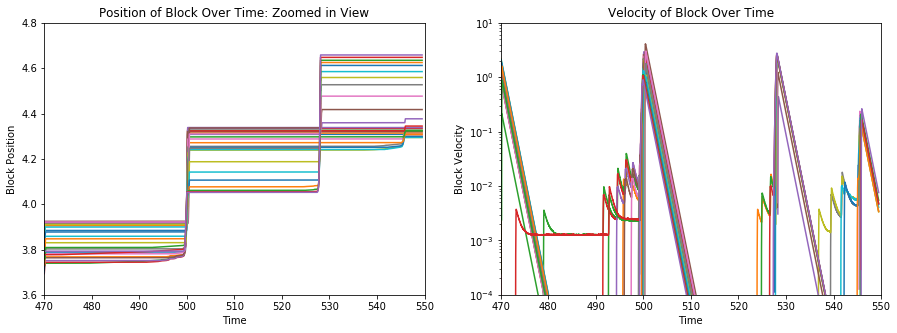

In [28]:
plt.figure(figsize = (15,5))

# Plots all of the block positions on the same plot
plt.subplot(121)
for i in range (1, blockNum + 1):
    plt.plot(earthquakePlot[:, 0], earthquakePlot[:, i])
plt.xlabel("Time")
plt.ylabel("Block Position")
plt.title("Position of Block Over Time: Zoomed in View")
plt.xlim(470,550)
plt.ylim(3.6,4.8)

# Plots all of the block velocities on the same plot
plt.subplot(122)
for i in range (0, blockNum):
    plt.semilogy(earthquakePlot[:,0], earthquakePlot[:, blockNum + i + 1])
plt.xlabel("Time")
plt.ylabel("Block Velocity")
plt.title("Velocity of Block Over Time")
plt.xlim(470,550)
plt.ylim(0.0001,10)

#### Figure 4

These plots are the same as those in figure 3 but scaled to depict the motion of the blocks in more detail. The left plot shows that sometimes all of the blocks move roughly in sync with each other, as at t = 500 and sometimes, only small groups of blocks move, as at t = 547. The right plot shows the velocities of the blocks (over a logarithmic scale, and a smaller timeframe). This shows that there are many small earthquakes such as those occurring at t = 540 along with the larger ones, such as the one that occurs at t = 530.

In [16]:
earthquakeTimes, earthquakeMoments = countQuakes(earthquakePlot, blockNum, timeStepShort)
earthquakeMagnitudes = list(map(np.log,earthquakeMoments))

C:\Users\adria\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


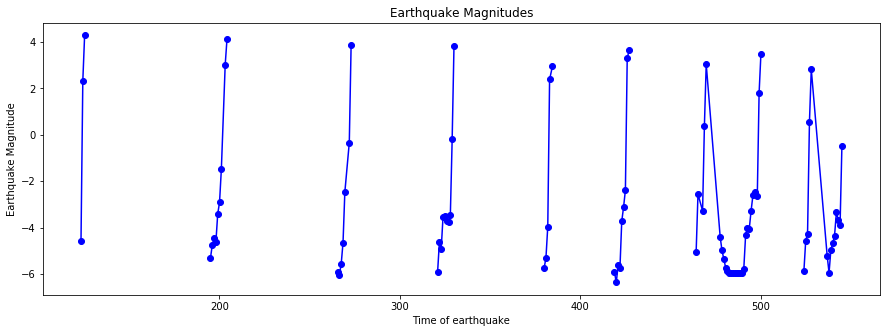

In [20]:
plt.figure(figsize = (15,5))
plt.plot(earthquakeTimes, earthquakeMagnitudes, "b-o")
plt.title("Earthquake Magnitudes")
plt.xlabel("Time of earthquake")
plt.ylabel("Earthquake Magnitude")
plt.show()

#### Figure 5

This plot represents the magnitude of each earthquake that occurred between t = 0 and t = 550. One point corresponds to one earthquake. The magnitudes are calculated by taking the logarithm of the moment, which is calculated using equation 6. This shows that a cluster of small earthquakes leads up to a large one, and then there are no earthquakes for a long period of time (about 75 time units), until this pattern repeats.

Text(0,0.5,'Number of Occurrences')

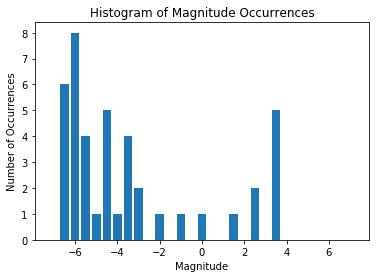

In [18]:
Magnitudes, Occurrences = countMagnitudes (earthquakeMagnitudes)
barWidth = 0.4
plt.bar(Magnitudes, Occurrences, barWidth)
plt.title("Histogram of Magnitude Occurrences")
plt.xlabel("Magnitude")
plt.ylabel("Number of Occurrences")

#### Figure 6

This plot is a histogram of the number of earthquake magnitudes that occurred over 550 time units. Each bar represents the earthquakes that fall within a magnitude range of 0.25. The height of each bar represents the number of earthquakes within the range that occurred in the timeframe

### Results From Large Earthquake Model

The following data was calculated in the file Big Data Collection. It uses the same methods described above, but over 5,000,000 time steps instead of 50,000.

In [5]:
from scipy.optimize import curve_fit

bigOccurences = [  0, 244, 777, 523, 576, 693, 643, 674, 463, 326, 178, 107,  97,  56,  54,  55,  58,  57,
  94, 149, 214, 352, 488, 164,   6,   0,   0,   0,   0] # Histogram collected in Big Data Colleciton file
bigMagnitudes = np.linspace(-7, 7, 29)

In [6]:
def expectedFit(x, a, b):
    """
    Returns the expected fit for the histogram
    
    Arguments: x - the x value in the equation
               a - the first fit parameter
               b - the second fit paramter
               
    Returned: The expected fit function
    """
    return a * np.exp(-b * x)

occurenceRegion = bigOccurences[7:14] # Only fits region of interest
magnitudeRegion = bigMagnitudes[7:14]

parameters, covariance = curve_fit(expectedFit, magnitudeRegion, occurenceRegion)

fitX = magnitudeRegion

aFit = parameters[0]
bFit = parameters[1]

fitY = aFit * np.exp(-bFit * magnitudeRegion)

print("A = ", aFit, "b = ", bFit)

A =  38.0348574567 b =  0.825306834171


Total Number of Earthquakes:  7048


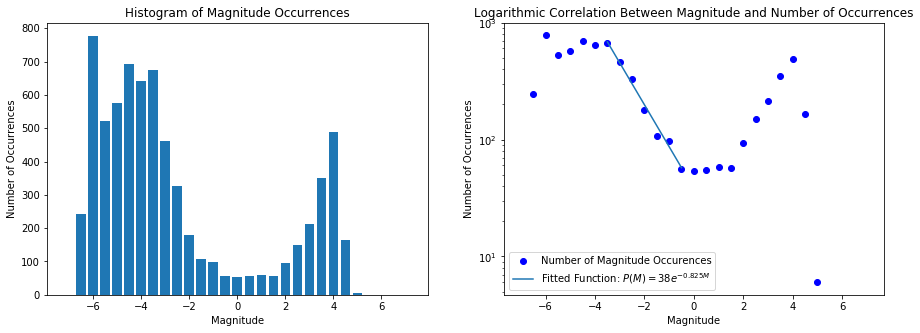

In [7]:
print("Total Number of Earthquakes: ", sum(bigOccurences))

plt.figure(figsize = (15,5))

barWidth = 0.4
plt.subplot(1,2,1)
plt.bar(bigMagnitudes, bigOccurences, barWidth)
plt.title("Histogram of Magnitude Occurrences")
plt.xlabel("Magnitude")
plt.ylabel("Number of Occurrences")

plt.subplot(1,2,2)

plt.semilogy(bigMagnitudes, bigOccurences, "b o", label = "Number of Magnitude Occurences")
plt.semilogy(fitX, fitY, label = "Fitted Function: $P(M) = 38e^{-0.825M}$")
plt.title("Logarithmic Correlation Between Magnitude and Number of Occurrences")
plt.xlabel("Magnitude")
plt.ylabel("Number of Occurrences")
plt.legend(loc = "best")
plt.show()

#### Figure 7

The above plots represent data collected over 5,000,000 time steps with 100 blocks of uniform mass (1 mass unit). Over this time frame, there were a total of 7048 earthquakes. The left plot is a histogram representing the number of earthquakes that occur within a magnitude range of 0.25. 

The right plot represents this same data and is scaled with a logarithmic scale on the y axis to show that there is a decaying exponential relationship between the probability and the magnitude of an earthquake over the magnitude range -3 to 0. This follows the Gutenberg-Richter law over the magnitude range -3 to 0. If the plot was consistent with the statistics observed in real life, it would be linear and decreasing over the entire range. Since there is an excess of large earthquakes, I found the fit between magnitudes -3 and 0 where the plot does show a decaying exponential trend. Over this range, the estimated function that fits the data is $P(\textbf M) = 38e^{-0.825\textbf M}$, where **M** is the magnitude. Here, the b value, 0.825, is below the range of b values we tend to observe with real life statistics.

Outside of the magnitude range -3 to 0, the plots show data that does not correspond to real-life statistics. If I were to fit a function to the data between magnitudes 2 and 4, the fit would be an increasing exponential function with a positive coefficient in the exponent. This is not consistent with the Gutenberg-Richter law, and it shows that the model is flawed in predicting the frequency of large earthquakes.

### Results From Model With Varying Masses

The following data was calculated in the file Big Data Collection. It uses the function blockMotionVaryingMasses() above. I chose to vary the masses of the blocks over a range from 0.5 to 2.0 mass units.

In [8]:
bigOccurences = [ 75, 167, 281, 268, 372, 455, 579, 579, 634, 542, 358, 222, 177, 126, 115,  93, 119, 132,
 182, 255, 345, 565, 374,  41,   0,   0,   0,   0,   0] # Histogram collected in Big Data Colleciton file
bigMagnitudes = np.linspace(-7, 7, 29)

In [9]:
occurenceRegion = bigOccurences[8:15]
magnitudeRegion = bigMagnitudes[8:15]

parameters, covariance = curve_fit(expectedFit, magnitudeRegion, occurenceRegion)

fitX = magnitudeRegion

aFit = parameters[0]
bFit = parameters[1]

fitY = aFit * np.exp(-bFit * magnitudeRegion)

print("A = ", aFit, "b = ", bFit)

A =  99.410874652 b =  0.632732466089


Total Number of Earthquakes:  7056


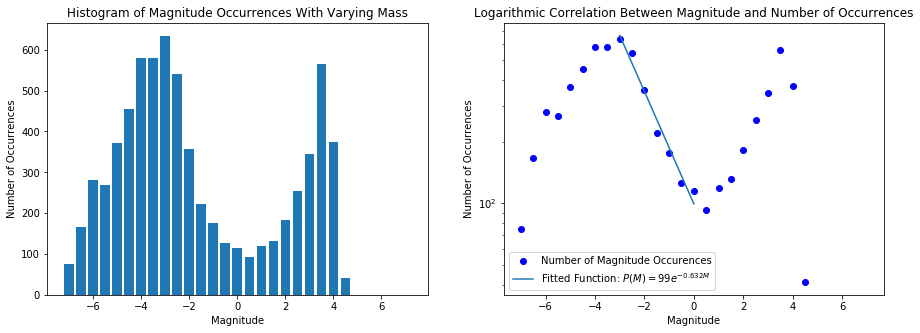

In [10]:
print("Total Number of Earthquakes: ", sum(bigOccurences))

plt.figure(figsize = (15,5))

barWidth = 0.4
plt.subplot(1,2,1)
plt.bar(bigMagnitudes, bigOccurences, barWidth)
plt.title("Histogram of Magnitude Occurrences With Varying Mass")
plt.xlabel("Magnitude")
plt.ylabel("Number of Occurrences")

plt.subplot(1,2,2)

plt.semilogy(bigMagnitudes, bigOccurences, "b o", label = "Number of Magnitude Occurences")
plt.semilogy(fitX, fitY, label = "Fitted Function: $P(M) = 99e^{-0.632 M}$")
plt.title("Logarithmic Correlation Between Magnitude and Number of Occurrences")
plt.xlabel("Magnitude")
plt.ylabel("Number of Occurrences")
plt.legend(loc = "best")
plt.show()

#### Figure 8

The above plots depict data collected over 5,000,000 time steps with 100 blocks that varied in mass from 0.5 to 2 mass units. Over this timeframe there were a total of 7056 earthquakes. The left plot is a histogram representing the number of earthquakes that occur within a magnitude range of 0.25. 

The right plot is scaled logarithmically to show that there is decaying exponential trend between magnitudes -3 and 0. Over this range, the function that best fits the data is $P(\textbf M) = 99e^{-0.632 \textbf M}$, where **M** is the magnitude. Here, the b value, 0.632, is lower than the values obtained in previous studies, and it is slightly lower than the value I obtained using uniform masses.

As in figure 7, if I were to fit a function to the magnitude range 2 to 4, the fit would be an exponential function with a positive coefficient in the exponent. This is not consistent with the Gutenberg-Richter law, and it shows that the model is flawed in predicting the frequency of large earthquakes, even with varied masses.

## Analysis <a id='ex4'></a>

Before I could make conclusions about earthquake behavior based on this model, I first had to determine its qualitative accuracy compared to statistics obtained from real events. The data in figures 7 and 8 indicates that the model qualitatively obeys the power law for earthquakes of small magnitudes, but not for earthquakes of large magnitudes. In figure 7, there is an exponential decay from magnitudes -3 to 0, which is consistent with the Gutenberg-Righter law. However, for magnitudes above zero, the frequency increases with magnitude. This indicates that the model needs improvement so that it can replicate the behavior of real earthquakes of all magnitudes. According to previous studies, the b value should be between 0.9 and 1.1 $^{[4]}$. In my model, b = 0.825, which is outside of this range. Due to the excess of large magnitudes, the earthquakes outside of the magnitude range -3 to 0 were not included in the calculation of b. 

There are many possible reasons for this excess of large earthquakes. I used a small number of blocks (100), and as a result, the motion of one block is highly influential to the overall model. Also, the model represented in figure 7 has uniform block masses and $k_c$ values, and this does not reflect the structure of natural fault lines. Numerical error may have also had an impact on the data. The simulation would be more precise with a smaller timestep, and the results vary depending on the method of counting earthquakes and the maximum earthquake length. Improvements to this model include varying these parameters and analyzing the friction force more carefully.

I hypothesized that varying the block masses might result in data that better fits the Gutenberg-Richter law. To test this, I varied the masses of the blocks from 0.5 to 2 mass units and kept all other parameters the same. Essentially, the resulting magnitude histogram did not change. It still shows an excess of large earthquakes, and a negative exponential decay from -3 to 0. Here, b = 0.632, which is less accurate than in the prior simulation. This shows that that the amount of variation in the masses does not have a significant effect on the model. One reason the b value might be lower is because the average mass was raised to 1.25 mass units. To be get more conclusive data, I might run more simulations on different systems of blocks with different average masses. 

Although the magnitude distribution in the model does not match the natural magnitude distribution, it does have characteristics that are consistent with real earthquakes. Figures 3 and 4 depict a wide range of earthquake sizes, and in some earthquakes, all of the blocks move, while in others, only a small number of them move. Figure 5 depicts the pattern in which the earthquakes tend to occur: it appears from this plot that each large earthquake tends to be preceded by multiple smaller ones, as in nature. This pattern provides evidence that the earth's crust is not continuously in a state of self-organized criticality, but that this state builds up over time. If this model was in a constant state of self-organized criticality, we would most likely see a random fluctuation in earthquake magnitude in time.

## Summary <a id='ex5'></a>

### Scientific Summary

This project uses a version of Burridge and Knopoff's block-spring model to illustrate properties of earthquakes. When run over a long period of time, the simulation produces earthquakes that follow the Gutenberg-Richter law for earthquakes of small magnitudes. However, there is an excess of large earthquakes. When the masses are varied, the general distribution of earthquake magnitudes remains consistent with the prior distribution. This suggests that the model is consistent with the frequency distribution of small magnitude earthquakes, but not that of large magnitude earthquakes, and therefore does not accurately reflect the phenomena we observe in the earth's crust. Over short periods of time, the earthquakes display a pattern. Large earthquakes are preceded by multiple smaller ones and followed by a long period of time with no earthquakes. This is consistent with the buildup and release of stress on real tectonic plates. It indicates we may be able to predict the onset of large earthquakes based on the frequency and magnitude of previous earthquakes.

### Personal Summary

I am proud of what I was able to accomplish with this project. There was a lot of problem solving involved, and I have never modeled something in this way before. As a result, I feel that my modeling and programming skills have increased through completing this model. I also learned a lot about the mechanics of earthquakes, and I am interested in this topic, because it affects a lot of people all over the world. I believe it is important that we understand the nature of earthquakes so that we can do our best to mitigate damage in the future.

## References: <a id='ex6'></a>

[1] Giordano N. 1997. "Computational Physics." Upper Sadie River, NJ: Pretence-Hall inc. p. 315-328

[2] Sammis C, Smith S. 1999. "Seismic Cycles and the Evolution of Stress Correlation in Cellular
Automaton Models of Finite Fault Networks." Pure and Applied Geophysics. 155(1)

[3] R. Burridge, L. Knopoff; "Body force equivalents for seismic dislocations." Bulletin of the Seismological Society of America ; 54 (6A): 1875–1888

[4] Márquez-Ramírez, V.H., Nava, F.A. & Zúñiga, F.R. "Correcting the Gutenberg–Richter b-value for effects of rounding and noise." Earthq Sci (2015) 28: 129. 

[5] Spence, William, et al. “Measuring the Size of an Earthquake.” U.S. Geological Survey, 1989. 

[6] Brochini, L. et al. "Phase transitions and self-organized criticality in networks of stochastic spiking neurons." Sci. Rep. 6, 35831; doi: 10.1038/srep35831 (2016). 

[7] "Plate Tectonics." Bucknell University, 2017.

[8] “Seismicity and Earthquake Hazard in the UK.” Seismicity And Earthquake Hazard In The UK, National Environment Research Council, 2018.

In [13]:
if __name__ == "__main__":
    import doctest
    doctest.testmod()